In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
G = nx.dodecahedral_graph()
pos = nx.spring_layout(G, seed=42)

In [8]:
class HamiltonSolver:
    def __init__(self, graph):
        self.graph = graph
        self.num_nodes = graph.number_of_nodes()
        
        self.nodes = list(graph.nodes())
        self.path = []

    def is_safe(self, v, pos, path):
    
        prev_node = path[pos - 1]
        if not self.graph.has_edge(prev_node, v):
            return False

        
        if v in path:
            return False

        return True

    def solve_util(self, path):
        
        if len(path) == self.num_nodes:
        
            if self.graph.has_edge(path[-1], path[0]):
                return True 
            else:
                return False


        last_node = path[-1]
        for neighbor in self.graph.neighbors(last_node):
            if neighbor not in path:
                path.append(neighbor)
                
                
                if self.solve_util(path):
                    return True
                
                
                path.pop()

        return False

    def find_cycle(self):
        
        start_node = self.nodes[0]
        self.path = [start_node]
        
        if self.solve_util(self.path):
            
            self.path.append(start_node)
            return self.path
        else:
            return None

print("Search Hamilton Circle Backtracking...")
solver = HamiltonSolver(G)
hamilton_path = solver.find_cycle()

Search Hamilton Circle Backtracking...


 Circle found: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0]


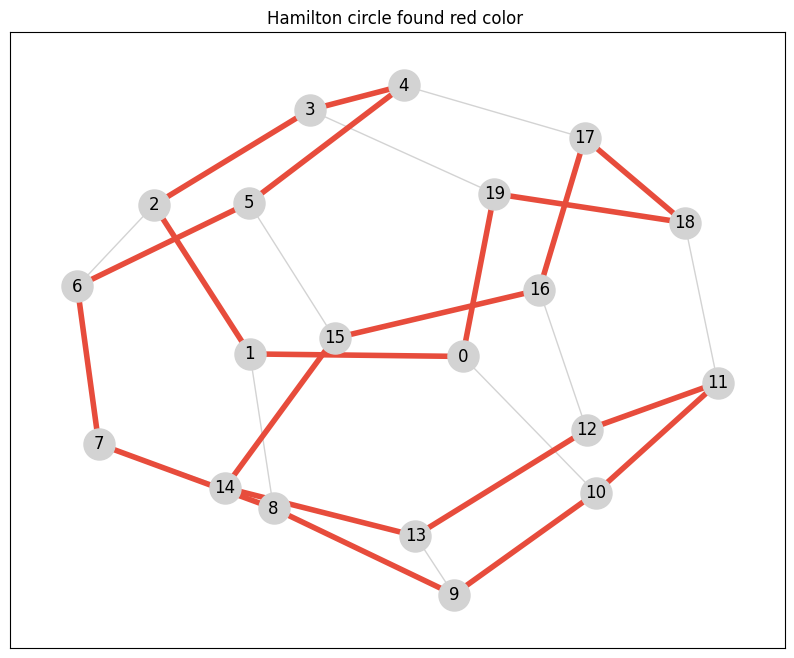

In [10]:
plt.figure(figsize=(10, 8))

if hamilton_path:
    print(f" Circle found: {hamilton_path}")
    

    path_edges = list(zip(hamilton_path, hamilton_path[1:]))
    
    
    nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=500)
    nx.draw_networkx_edges(G, pos, edge_color='lightgray', width=1)
    nx.draw_networkx_labels(G, pos)
    

    nx.draw_networkx_edges(G, pos, 
                           edgelist=path_edges, 
                           edge_color='#e74c3c', 
                           width=4)              
    
    plt.title("Hamilton circle found red color ")
    
else:
    print("No Hamilton circle found!")
    nx.draw(G, pos, with_labels=True, node_color='lightgray')
    plt.title("No Hamiltonian cycle in this graph")

plt.show()